<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JCLC9027/blob/main/Actividad_Semanal___7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

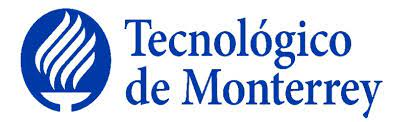
# Maestria: Inteligencia artificial aplicada (MNA)
# Materia:Ciencia Y Analítica de Datos 
# Alumno: Juan Carlos López Cruz.
# Matricula: A01793052
# Profesor Titular: PhD. María de la Paz Rico Fdz.
# Profesor Tutor: Victoria Guerrero Orozco
# Actividad Semanal -- 7 Regresiones y K means

#Notebook 1. Regresión. 

## Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

Liberias

In [320]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#Modelos de regresion.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline

In [321]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [322]:
X.describe()

,Number of Units
count,1000.000000
mean,4.472799
std,1.336241
min,1.000000
25%,3.594214
50%,4.435958
75%,5.324780
max,10.000000


In [323]:
y.describe()

count    1000.000000
mean       40.052999
std        10.595322
min        20.000000
25%        32.912036
50%        38.345781
75%        44.531822
max       100.000000
Name: Manufacturing Cost, dtype: float64

### -Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).


In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 800
Tamaño de X_train: (800, 1)
**************************************************
Mumero total de registros en el test dataset: 200
Tamaño del X_test: (200, 1)


### Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [325]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

Modelo Generado (ecuación)

In [326]:
 linear_reg.coef_, linear_reg.intercept_

(array([-5.97912772]), 66.79997932683362)

The model estimates:

$\hat{y} = -5.979X + 66.799$

Su visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


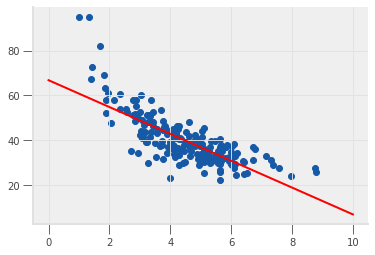

In [327]:
plt.scatter(X_test, y_test)
X_fit = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = linear_reg.predict(X_fit)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")


Sus errores y r cuadrada.

In [328]:
y_pred=linear_reg.predict(X_test)
MAE_RL=metrics.mean_absolute_error(y_test, y_pred)
RMSE_RL=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_RL=r2_score(y_test, y_pred)
print('Regresión Lineal Erores:')
print('Error medio Absoluto (MAE):', MAE_RL)
print('Root Mean Squared Error:', RMSE_RL)
print('r2_score',R2_RL)

Regresión Lineal Erores:
Error medio Absoluto (MAE): 5.033403667160277
Root Mean Squared Error: 7.067709647692056
r2_score 0.595798333672179


### Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [329]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

 Modelo Generado (ecuación)

In [330]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_poly, y_train)
lin_reg_poly.coef_, lin_reg_poly.intercept_

(array([-31.83069901,   4.58905775,  -0.23734936]), 109.50904482461846)

The model estimates:

$\hat{y}= -31.83X +4.58X^2 -0.237X^3 + 109.509$

Su visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


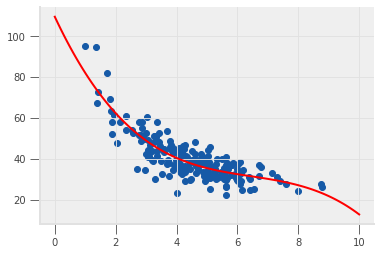

In [331]:
plt.scatter(X_test, y_test)
X_fit_P = np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_fit_P)
y_fit = lin_reg_poly.predict(X_new_poly)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")

Sus errores y r cuadrada.

In [332]:
X_test_poly= poly_features.transform(X_test)
y_pred_poly=lin_reg_poly.predict(X_test_poly)

In [333]:
MAE_RP=metrics.mean_absolute_error(y_test, y_pred_poly)
RMSE_RP=np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly))
R2_RP=r2_score(y_test, y_pred_poly)
print('Regresión Polinomial Errores:')
print('Error medio Absoluto (MAE):', MAE_RP)
print('Root Mean Squared Error:', RMSE_RP)
print('r2_score',R2_RP)

Regresión Polinomial Errores:
Error medio Absoluto (MAE): 4.339059416327442
Root Mean Squared Error: 5.637445640824418
r2_score 0.7428388053898056


### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#### Regresión con Ridge

In [334]:
from sklearn.pipeline import Pipeline
ridgeP1=Pipeline([('poly',PolynomialFeatures(degree=6, include_bias=False)),('rig',Ridge(alpha=0.000001))])
ridgeP1.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=6, include_bias=False)),
                ('rig', Ridge(alpha=1e-06))])

Modelo generado (ecuación)

In [335]:
ridgeP1.named_steps['rig'].coef_, ridgeP1.named_steps['rig'].intercept_

(array([-1.71832928e+02,  8.07064947e+01, -2.08056597e+01,  2.95648240e+00,
        -2.16583518e-01,  6.36191133e-03]), 207.4252450344563)

The model estimates:

$\hat{y} = -(1.71832928e+02)X +(8.07064947e+01)X^2-(2.08056597e+01)X^3+(2.95648240e+00)X^4-(2.16583518e-01)X^5+(6.36191133e-03) X^6+207.4252450344563$


Su visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


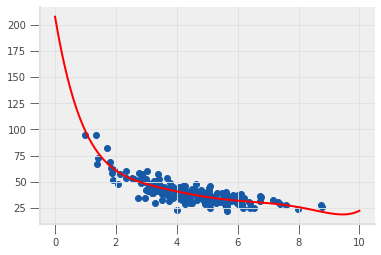

In [336]:
plt.scatter(X_test, y_test)
X_fit_R = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = ridgeP1.predict(X_fit)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")


Sus Errores y R cuadra

In [337]:
y_pred_rid=ridgeP1.predict(X_test)

In [338]:
MAE_Ridge=metrics.mean_absolute_error(y_test, y_pred_rid)
RMSE_Ridge=np.sqrt(metrics.mean_squared_error(y_test, y_pred_rid))
R2_Ridge=r2_score(y_test, y_pred_rid)
print('Regresión Ridge:')
print('Error medio Absoluto (MAE):', MAE_Ridge)
print('Root Mean Squared Error:', RMSE_Ridge)
print('r2_score',R2_Ridge)

Regresión Ridge:
Error medio Absoluto (MAE): 4.2889873785933155
Root Mean Squared Error: 5.484234585966459
r2_score 0.7566268032333564


#### Regresión con Lasso

In [339]:
LassoP1=Pipeline([('poly',PolynomialFeatures(degree=3, include_bias=False)),('la',Lasso(alpha=0.2))])
LassoP1.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3, include_bias=False)),
                ('la', Lasso(alpha=0.2))])

Modelo generado (ecuación)

In [340]:
LassoP1.named_steps['la'].coef_, LassoP1.named_steps['la'].intercept_

(array([-9.96217989, -0.        ,  0.05904549]), 77.91274393658172)

The model estimates:

$\hat{y} = -9.96217989X+(0.05904549)X^3+77.91274393658172$


Su visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


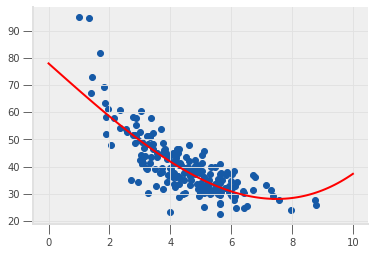

In [341]:
plt.scatter(X_test, y_test)
X_fit = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = LassoP1.predict(X_fit)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")


Sus Errores y R cuadra

In [342]:
y_pred_lasso=LassoP1.predict(X_test)

In [343]:
MAE_Lasso=metrics.mean_absolute_error(y_test, y_pred_lasso)
RMSE_Lasso=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
R2_Lasso=r2_score(y_test, y_pred_lasso)
print('Regresión Lasso:')
print('Error medio Absoluto (MAE):', MAE_Lasso)
print('Root Mean Squared Error:', RMSE_Lasso)
print('r2_score',R2_Lasso)

Regresión Lasso:
Error medio Absoluto (MAE): 4.492932044546694
Root Mean Squared Error: 6.241736117870446
r2_score 0.6847526037950016


#### Finalmente grafica:


MAE (de los cuatro métodos)

In [344]:
MAE_values=[MAE_RL,MAE_RP,MAE_Ridge,MAE_Lasso]
MAE_labels=['MAE_RL','MAE_RP','MAE_Ridge','MAE_Lasso']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


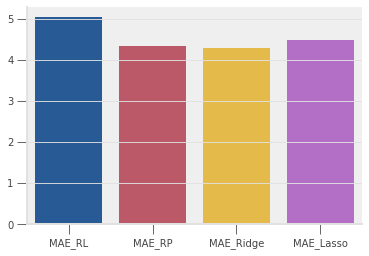

In [345]:
sns.barplot(MAE_labels, MAE_values)

**Comentarios:**

Ridge muestra mejores resultados en MAE comparando los demas, el peor fue Regresion lineal simple, Recordando que el valor optimo es que sea mas pequeño.

$R^2$ (de los cuatro métodos)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


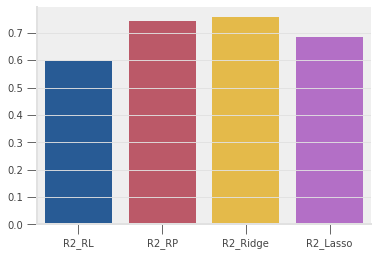

In [346]:
R2_values=[R2_RL,R2_RP,R2_Ridge,R2_Lasso]
R2_labels=['R2_RL','R2_RP','R2_Ridge','R2_Lasso']
sns.barplot(R2_labels, R2_values)

**Comentarios:**

Ridge muestra mejores resultados en $R^2$ comparando los demas, el peor fue Regresion lineal simple. Recordando que el valor optimo es el que esta mas cerca del 1.

### Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

¿Que método conviene más a la empresa?, ¿por que?

De acuerdo a lo revisado el metodo que conviene mas a la empresa es el metodo de **Regresion Polinomial con un orden de 6 y Regularizacion Ridge** comparando los Errores MAE y RMSE fue el que mostro un error mas bajo y mostro un mayor $R^2$ que como recordamos entre mas cercano este a un valor de 1 muestra mejores resultados.

¿qué porcentajes de entrenamiento y evaluación usaste?

Use 20% de los datos para prueba y 80% para entrenamiento, que es lo que recomiendan los expertos usar para entrenar modelos.

¿que error tienes? ¿es bueno? ¿Cómo lo sabes?

Debido a que la escala que tenemos son valores que van de 20 a 100.

Los errores que tuvimos en el mejor modelo que fue Regresion Polinomial con un orden de 3 fueron:

Regresión Ridge:
- Error medio Absoluto (MAE): 4.2889873785933155
- Root Mean Squared Error: 5.484234585966459
- r2_score: 0.7566268032333564

Se tuvieron errores relativamente pequeños que muestran un error de 4 a 5 en MAE y RMSE ya que estos errores estan en las mismas unidades y escala que los datos originales y se busca que siempre sean bajos

Revisando la $R^2$ se busca que sea un valor cercano al 1 lo que muestra que es un modelo bueno y el modelo de Regresion Polinomial con un orden de 6 y  fue el que mostro un valor mas alto en esta variable.

Yo creo que se puede mejorar aun mas los valores de los errores y la R2 tal vez aplicando una transformacion a los dato o con algun otro modelo de entrenamiento.

## Ejercicio 2. Regresión múltiple.

In [347]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2405,9547205660,20150504T000000,603000.0,3,2.25,1700,2800,2.0,0,0,...,7,1150,550,1926,0,98115,47.6819,-122.311,1500,3400
11887,3336001360,20140826T000000,254000.0,2,1.00,910,6000,1.0,0,0,...,6,910,0,1943,0,98118,47.5253,-122.266,1460,5800
4005,1523069086,20140605T000000,395000.0,3,1.75,1460,22651,1.0,0,0,...,7,1460,0,1961,0,98027,47.4861,-122.030,2030,49222
4287,8902000068,20140515T000000,430000.0,3,2.00,1510,7066,1.0,0,2,...,7,1230,280,1973,0,98125,47.7053,-122.303,1950,8089
9381,7732650120,20140728T000000,1050000.0,4,2.50,2750,9949,2.0,0,0,...,10,2750,0,1999,0,98007,47.6595,-122.147,2750,9860
6024,7853301700,20150420T000000,635000.0,5,2.75,3110,6621,2.0,0,0,...,9,3110,0,2006,0,98065,47.5430,-121.888,3550,7953
17217,6300500479,20140819T000000,410000.0,3,2.50,1509,1418,3.0,0,0,...,8,1509,0,2014,0,98133,47.7047,-122.340,1509,1991
12384,2652500126,20150217T000000,570500.0,2,1.00,1380,1800,2.0,0,0,...,7,1080,300,1954,0,98119,47.6416,-122.361,1600,3600
13850,2423059060,20150420T000000,838000.0,3,3.75,2930,150945,2.0,0,0,...,8,2930,0,1972,2000,98058,47.4658,-122.115,2070,43935
18978,7853220910,20140915T000000,485000.0,3,2.50,2270,7887,2.0,0,2,...,8,2270,0,2004,0,98065,47.5326,-121.855,2550,7133


In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [349]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [350]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

In [351]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [352]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6210.000000,871200.000000


In [353]:
y.describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


### Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).

In [354]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 17290
Tamaño de X_train: (17290, 15)
**************************************************
Mumero total de registros en el test dataset: 4323
Tamaño del X_test: (4323, 15)


### Regresión Múltiple Lineal.
Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.


In [355]:
M_linear_reg = LinearRegression(fit_intercept=True)
M_linear_reg.fit(X_train, y_train)

LinearRegression()

Modelo Generado (ecuación)

In [356]:
M_linear_reg.coef_, M_linear_reg.intercept_


(array([[-3.71022526e+04,  4.01418845e+04,  1.09169906e+02,
          2.64378621e-02,  2.95338523e+04,  5.52048615e+05,
          4.22004055e+04,  2.21281704e+04,  1.21117318e+05,
          5.02818538e+01,  5.88880527e+01, -3.52812693e+03,
          1.04703799e+01,  2.60075557e+01, -5.66471373e-01]]),
 array([6093360.93532767]))

The model estimates:

$\hat{y} = -(3.71022526e+04)X1+(4.01418845e+04)X2+(1.09169906e+02)X3+(2.64378621e-02)X4+(2.95338523e+04)X5+(5.52048615e+05)X6+(4.22004055e+04)X7+(2.21281704e+04)X8+(1.21117318e+05)X9+(5.02818538e+01)X10+(5.88880527e+01)X11-(3.52812693e+03)X12+( 1.04703799e+01)X13+(2.60075557e+01)X14-(5.66471373e-01)X15+6093360.93532767$


Su visualización

In [357]:
y_test.reset_index(drop=True,inplace = True) # Eliminaremos el index para mejorar la visualizacion

In [358]:
y_M_pred=M_linear_reg.predict(X_test)

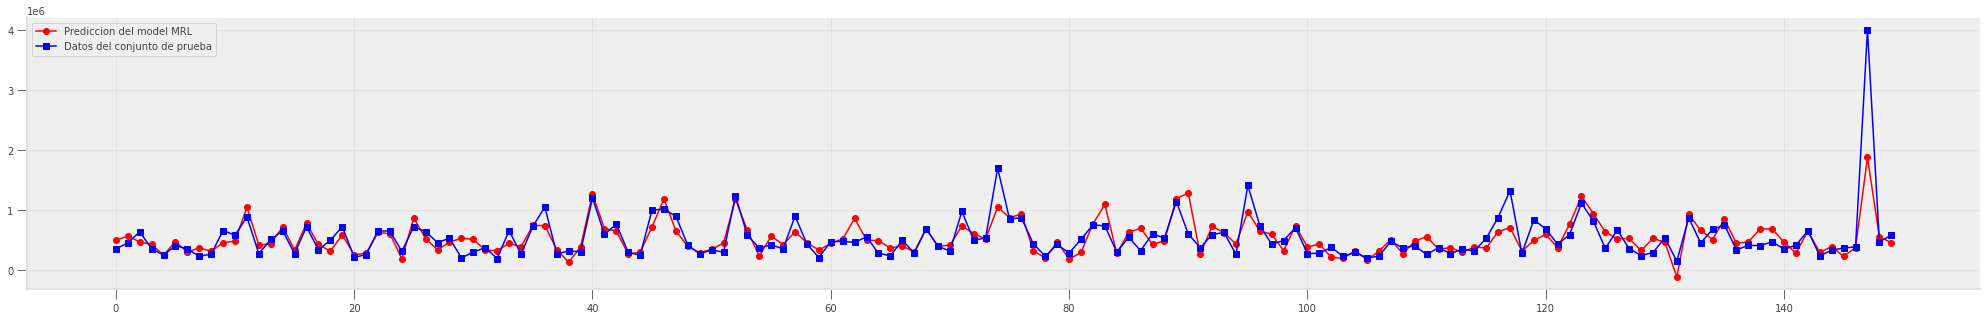

In [359]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(y_M_pred[0:150],'r-o',label='predicted') # Solo usaremos 120 para fines de visualizacion
plt.plot(y_test[0:150],'b-s',label='Tested') # Solo usaremos 120 para fines de visualizacion
plt.legend(['Prediccion del model MRL','Datos del conjunto de prueba'])

Sus errores y r cuadrada.

In [360]:

MAE_MRL=metrics.mean_absolute_error(y_test, y_M_pred)
RMSE_MRL=np.sqrt(metrics.mean_squared_error(y_test, y_M_pred))
R2_MRL=r2_score(y_test, y_M_pred)
print('Regresión Lineal Erores:')
print('Error medio Absoluto (MAE):', MAE_MRL)
print('Root Mean Squared Error:', RMSE_MRL)
print('r2_score',R2_MRL)



Regresión Lineal Erores:
Error medio Absoluto (MAE): 136332.19435816686
Root Mean Squared Error: 213832.57523968336
r2_score 0.6648546558345214


### Regresión Polinomial.

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [361]:
M_poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_M_poly = M_poly_features.fit_transform(X_train)

 Modelo Generado (ecuación)

In [362]:
lin_reg_M_poly = LinearRegression(fit_intercept=True)
lin_reg_M_poly.fit(X_M_poly, y_train)
lin_reg_M_poly.coef_.shape

(1, 135)

In [363]:
lin_reg_M_poly.coef_

array([[ 1.01546643e+06, -1.17473872e+06,  4.88877447e+03,
        -3.02395414e+01, -2.04113893e+06, -3.37343967e+06,
        -2.32409396e+05,  4.65228240e+05,  1.03575786e+06,
        -5.71901219e+03, -5.83036698e+03, -8.62721107e+04,
        -2.97762923e+03,  4.11361563e+03, -3.44994320e+01,
         8.42532473e+02,  7.44046499e+03,  1.53881562e+02,
        -2.73170746e-02,  8.98401278e+03, -2.67097659e+03,
        -4.19493722e+03, -4.62336967e+03, -4.80525443e+03,
        -1.68414573e+02, -1.81484361e+02, -5.13025931e+02,
        -1.21183364e+01,  1.97855035e+01,  2.08711018e-01,
        -8.69294429e+03,  3.34053775e+01, -1.45256220e-01,
        -2.65020503e+04,  2.37750838e+04,  6.61632205e+03,
        -2.61014961e+03,  2.02295957e+04, -4.11022577e+00,
        -2.26468112e+01,  5.57330897e+02, -1.82081568e+01,
        -2.01555218e+01, -5.51449943e-02,  1.56502048e+03,
        -2.10969718e+03,  2.56839387e+00,  1.44609372e+02,
        -1.24053695e+01,  1.37365954e+01,  2.38333770e+0

In [364]:
lin_reg_M_poly.intercept_

array([80863582.48791893])

The model estimates:

En este caso la ecuacion generada es muy grande ya que mezcla las variables al utilizar un polinomio de grado 2 con 15 variables nos da 135 coeficientes.

Su visualización

In [365]:
X_test_M_poly= M_poly_features.transform(X_test)
y_pred_M_poly=lin_reg_M_poly.predict(X_test_M_poly)

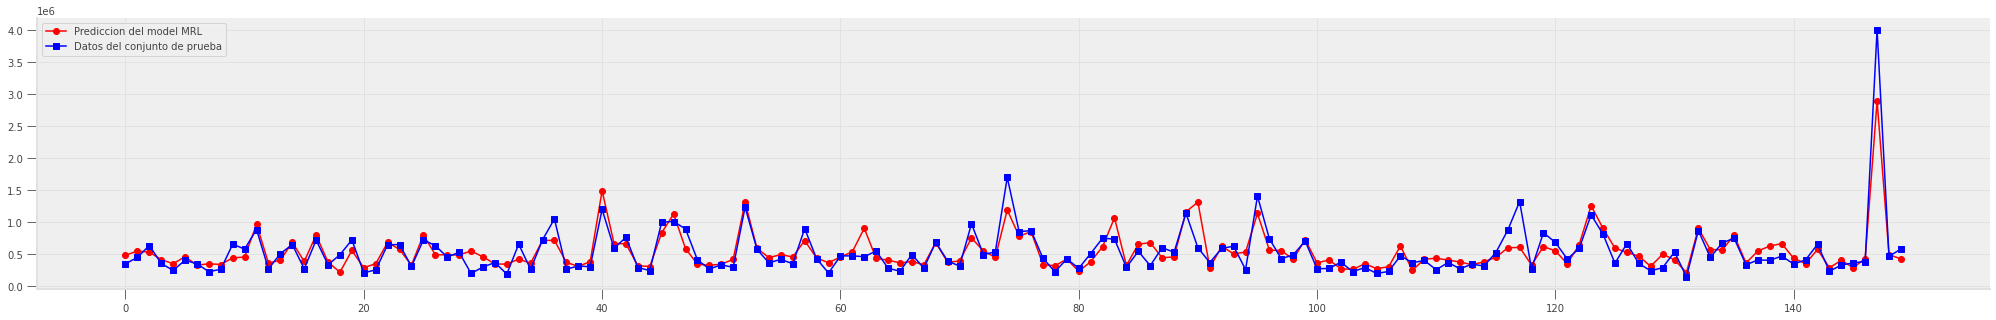

In [366]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(y_pred_M_poly[0:150],'r-o',label='predicted') # Solo usaremos 120 para fines de visualizacion
plt.plot(y_test[0:150],'b-s',label='Tested') # Solo usaremos 120 para fines de visualizacion
plt.legend(['Prediccion del model MRL','Datos del conjunto de prueba'])

Sus errores y r cuadrada.

In [367]:
MAE_MRP=metrics.mean_absolute_error(y_test, y_pred_M_poly)
RMSE_MRP=np.sqrt(metrics.mean_squared_error(y_test, y_pred_M_poly))
R2_MRP=r2_score(y_test, y_pred_M_poly)
print('Regresión Polinomial Errores:')
print('Error medio Absoluto (MAE):', MAE_MRP)
print('Root Mean Squared Error:', RMSE_MRP)
print('r2_score',R2_MRP)

Regresión Polinomial Errores:
Error medio Absoluto (MAE): 122015.80006144893
Root Mean Squared Error: 181470.06574727758
r2_score 0.7586232413126757


### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

#### Regresión con Ridge

In [368]:
ridge1M=Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),('rg',Ridge(alpha=0.0001))])
ridge1M.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('rg', Ridge(alpha=0.0001))])

Modelo generado (ecuación)

In [369]:
ridge1M.named_steps['rg'].coef_.shape

(1, 135)

In [370]:
ridge1M.named_steps['rg'].coef_, ridge1M.named_steps['rg'].intercept_

(array([[ 1.01543166e+06, -1.17444561e+06,  5.73483315e+05,
         -3.02400613e+01, -2.03974153e+06, -4.12081531e+06,
         -2.33584723e+05,  4.65261510e+05,  1.03549387e+06,
         -5.74314235e+05, -5.74424591e+05, -8.62718309e+04,
         -2.97781460e+03,  4.11390302e+03, -3.44982131e+01,
          8.42548709e+02,  7.43918962e+03,  6.79490019e+05,
         -2.73341828e-02,  8.98188646e+03, -2.73926940e+03,
         -4.19308194e+03, -4.62413118e+03, -4.80593072e+03,
         -6.79504551e+05, -6.79517623e+05, -5.13002083e+02,
         -1.21171577e+01,  1.97843336e+01,  2.08717802e-01,
         -8.69125752e+03, -1.98010477e+05, -1.45243949e-01,
         -2.64931479e+04,  2.38943525e+04,  6.60739735e+03,
         -2.61207451e+03,  2.02272842e+04,  1.98039771e+05,
          1.98021241e+05,  5.57183017e+02, -1.82092136e+01,
         -2.01493777e+01, -5.51978098e-02, -7.48456720e+05,
         -5.35067465e+05,  2.28895344e+05,  4.69874622e+05,
          1.31898532e+06,  8.95943407e+0

The model estimates:

En este caso la ecuacion generada es muy grande ya que mezcla las variables al utilizar un polinomio de grado 2 con 15 variables nos da 135 coeficientes.

Su visualización

In [371]:
y_pred_M_rid=ridge1M.predict(X_test)

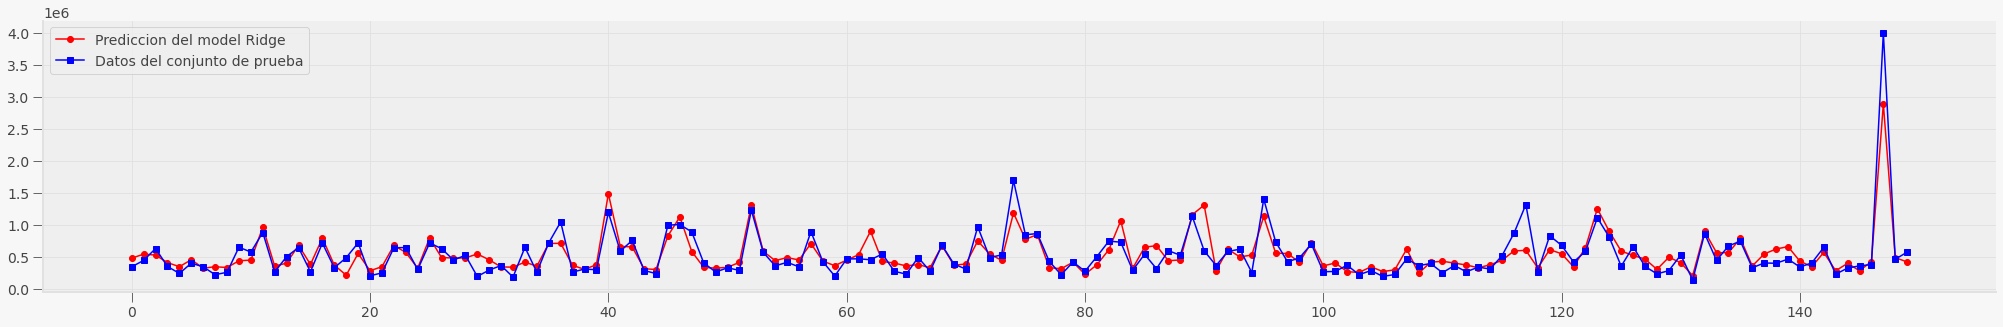

In [414]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(y_pred_M_rid[0:150],'r-o',label='predicted') # Solo usaremos 120 para fines de visualizacion
plt.plot(y_test[0:150],'b-s',label='Tested') # Solo usaremos 120 para fines de visualizacion
plt.legend(['Prediccion del model Ridge','Datos del conjunto de prueba'])

Sus Errores y R cuadra

In [373]:
MAE_MRidge=metrics.mean_absolute_error(y_test, y_pred_M_rid)
RMSE_MRidge=np.sqrt(metrics.mean_squared_error(y_test, y_pred_M_rid))
R2_MRidge=r2_score(y_test, y_pred_M_rid)
print('Regresión Ridge:')
print('Error medio Absoluto (MAE):', MAE_MRidge)
print('Root Mean Squared Error:', RMSE_MRidge)
print('r2_score',R2_MRidge)

Regresión Ridge:
Error medio Absoluto (MAE): 122014.71697421196
Root Mean Squared Error: 181468.94757576188
r2_score 0.7586262159055759


#### Regresión con Lasso

In [374]:
lasso1M=Pipeline([('poly',PolynomialFeatures(degree=2, include_bias=False)),('la',Lasso(fit_intercept=True,alpha=0.1))])
lasso1M.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.016e+14, tolerance: 2.323e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('la', Lasso(alpha=0.1))])

Modelo generado (ecuación)

In [375]:
lasso1M.named_steps['la'].coef_.shape

(135,)

In [376]:
lasso1M.named_steps['la'].coef_, lasso1M.named_steps['la'].intercept_

(array([ 1.23717556e+05,  1.60094643e+05,  7.21300813e+01, -2.92644207e+00,
        -3.70168849e+04,  4.25454850e+05,  7.39708929e+04,  1.24755188e+05,
         1.85882277e+05, -1.90780825e+02, -7.54825432e+01, -3.79814089e+03,
        -2.46187434e+02,  1.57405382e+02, -1.52102709e+00,  9.27932592e+02,
        -3.18922311e+03, -1.92843464e+01, -2.09947821e-01,  8.95058433e+03,
        -1.90418209e+04, -3.39257618e+03,  1.16275361e+02, -3.62232234e+03,
         6.52230798e+00,  1.83340298e-01, -6.69916059e+01, -1.59741517e+00,
         2.12875445e+01,  2.97395854e-01,  2.34770165e+03,  4.46738822e+01,
         5.26479940e-03, -2.70237547e+04,  3.46640435e+04,  7.68291404e+03,
        -2.06724131e+04,  1.84757580e+04, -1.35799651e+01, -4.31174619e+01,
        -6.84165821e+01, -2.79082547e+01, -3.87181710e+01,  1.25491790e-01,
         2.12637856e-02, -1.46687697e-04,  6.92872653e+00, -8.82500951e+01,
         3.52889150e+01, -1.28956713e+01,  2.36216090e+01, -5.75723773e-02,
         2.6

The model estimates:

En este caso la ecuacion generada es muy grande ya que mezcla las variables al utilizar un polinomio de grado 2 con 15 variables nos da 135 coeficientes.

Su visualización

In [377]:
y_pred_Mlasso=lasso1M.predict(X_test)

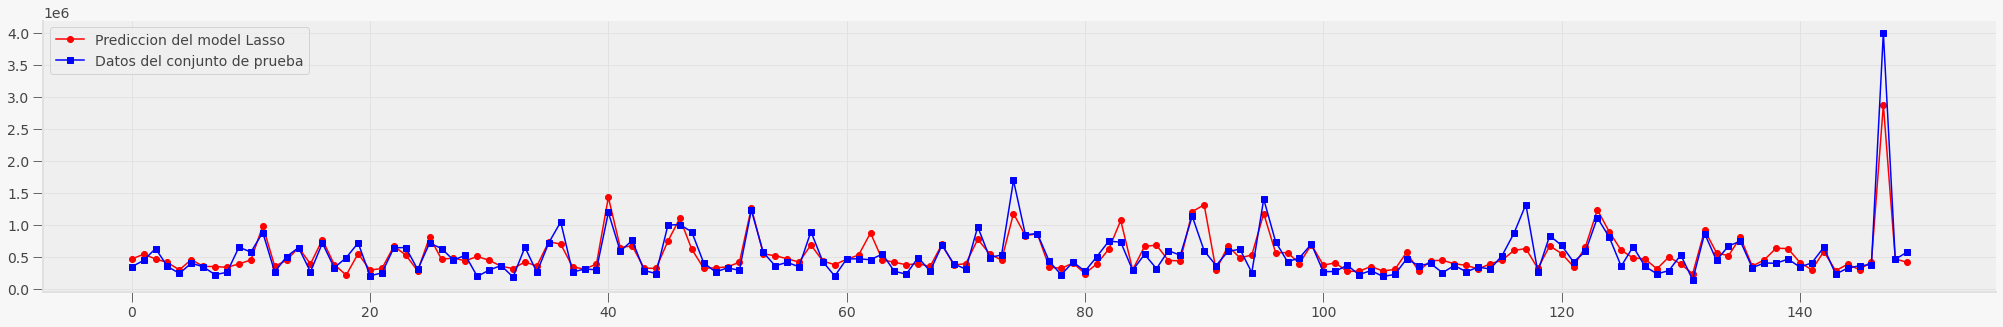

In [415]:
from matplotlib import markers
plt.figure(figsize=(35,5))
plt.plot(y_pred_Mlasso[0:150],'r-o',label='predicted') # Solo usaremos 120 para fines de visualizacion
plt.plot(y_test[0:150],'b-s',label='Tested') # Solo usaremos 120 para fines de visualizacion
plt.legend(['Prediccion del model Lasso','Datos del conjunto de prueba'])

Sus Errores y R cuadra

In [379]:
MAE_MLasso=metrics.mean_absolute_error(y_test, y_pred_Mlasso)
RMSE_MLasso=np.sqrt(metrics.mean_squared_error(y_test, y_pred_Mlasso))
R2_MLasso=r2_score(y_test, y_pred_Mlasso)
print('Regresión Lasso:')
print('Error medio Absoluto (MAE):', MAE_MLasso)
print('Root Mean Squared Error:', RMSE_MLasso)
print('r2_score',R2_MLasso)

Regresión Lasso:
Error medio Absoluto (MAE): 122937.22456458179
Root Mean Squared Error: 183324.85556292543
r2_score 0.7536638435248106


#### Finalmente grafica:


MAE (de los cuatro métodos)

In [380]:
MAE_values=[MAE_MRL,MAE_MRP,MAE_MRidge,MAE_MLasso]
MAE_labels=['MAE_MRL','MAE_MRP','MAE_MRidge','MAE_MLasso']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


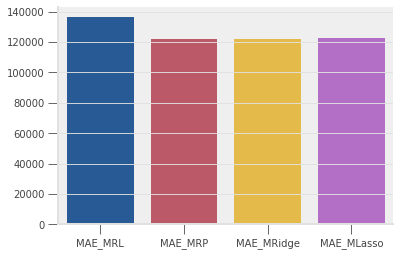

In [381]:
sns.barplot(MAE_labels, MAE_values)

**Comentarios:**

Ridge, Lasso y Regresion Polinomial mostraron mejores resultados que la regresion lineal.

$R^2$ (de los cuatro métodos)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


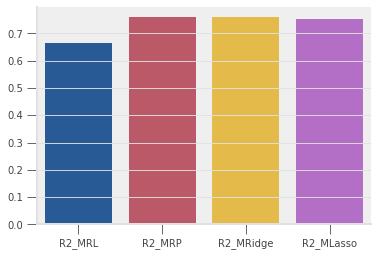

In [382]:
R2_values=[R2_MRL,R2_MRP,R2_MRidge,R2_MLasso]
R2_labels=['R2_MRL','R2_MRP','R2_MRidge','R2_MLasso']
sns.barplot(R2_labels, R2_values)

**Comentarios:**

Ridge, Lasso y Regresion Polinomial mostraron mejores resultados que la regresion lineal.

### Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

¿Que método conviene más a la empresa?, ¿por que?

De acuerdo a lo revisado el metodo que conviene mas a la empresa es el metodo de **Regresion Polinomial con un orden de 2** comparando los Errores MAE y RMSE fue el que mostro un error mas bajo y mostro un mayor $R^2$ que como recordamos entre mas cercano este a un valor de 1 muestra mejores resultados.

¿qué porcentajes de entrenamiento y evaluación usaste?

Use 10% de los datos para prueba y 90% para entrenamiento, en este caso decidi no seguir la bibliografia para agregar mas datos al entrenamiento y observar los resultados ya que tiene muchos datos el data set.

¿que error tienes? ¿es bueno? ¿Cómo lo sabes?

Debido a que la escala que tenemos son valores muy altos que van de $750K$ a $7.7M$.

Los errores que tuvimos en el mejor modelo que fue Regresion Polinomial con un orden de 2 y Regularizacion Ridge fueron:

Regresión Ridge:
-Error medio Absoluto (MAE): 122014.71697421196
-Root Mean Squared Error: 181468.94757576188
-r2_score 0.7586262159055759

Se tuvieron errores relativamente grandes en MAE y RMSE ya que estos errores estan en las mismas unidades y escala que los datos originales y se busca que siempre sean bajos tal vez con tecnicas adicionales de preprocesamiento de datos pueda mejorar esa condicion.

Revisando la $R^2$ se busca que sea un valor cercano al 1 lo que muestra que es un modelo bueno y el modelo de Regresion Polinomial con un orden de 2 fue el que mostro un valor mas alto en esta variable.

Yo creo que se puede mejorar aun mas los valores de los errores y la $R^2$ tal vez escalando los datos ya que en el caso de LAsso no logro converger por que la escala de los datos era muy grande.


#Notebook 2. K means

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [383]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [384]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [385]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [386]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [387]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [388]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

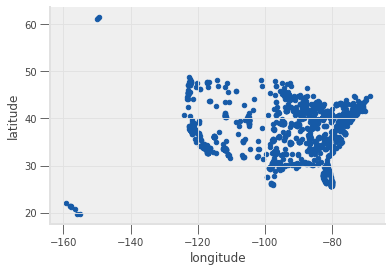

In [389]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [390]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [391]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [392]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [393]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [394]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [395]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

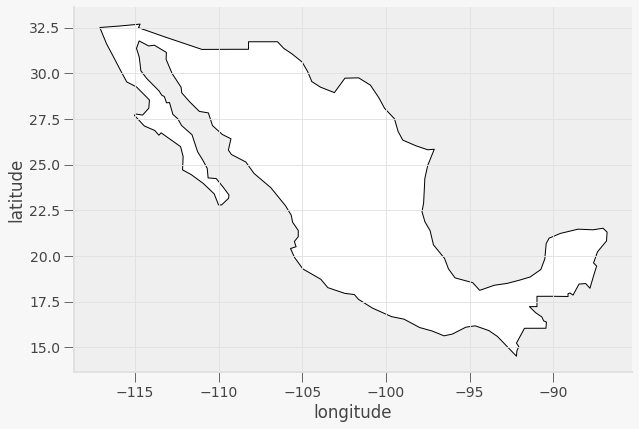

In [396]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

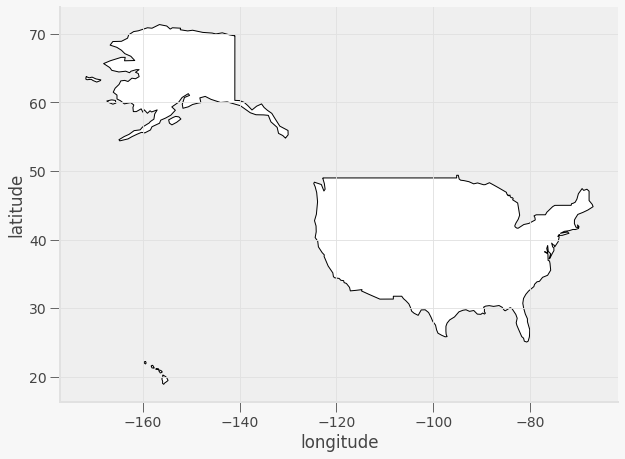

In [397]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

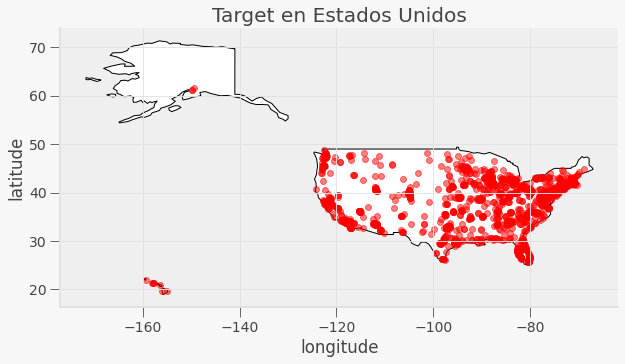

In [398]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

Inicio del codigo para la Tarea.

##Encuentra el numero ideal de almacenes, justifica tu respuesta:

### Encuentra las latitudes y longitudes de los almacenes, ¿qué ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estará?

In [399]:
#tu codigo aquí
clusters=range(1,20) # Se crean del 1 al 20 valores para posibles clusters
inercias=[] # Se crea una lista para las inercias

In [400]:
from sklearn.cluster import KMeans #liberia para modelo Kmeans

# Secrea un contador para almacenar las inercias usando diferentes valores de clusters.
for cluster in clusters:
	model = KMeans(n_clusters = cluster) 
	model = model.fit(latlong)
	
	inercias.append(model.inertia_)


Grafica de Codo o Elbow.

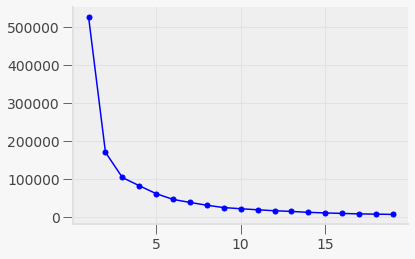

In [401]:
plt.plot(clusters, inercias, 'bo-', markersize=5)


**Comentarios:**

Se tomara el valor de 5 ya que es el valor obtimo que se muestra en la grafica de codo ya que la bibliografia comenta Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroid. Como el valor de la media diminuirá a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de descenso se “afila”

In [402]:
#Entrenamos el modelo con un valor de 5
model = KMeans(n_clusters = 5)
model.fit(latlong)


KMeans(n_clusters=5)

latitudes y longitudes de los almacenes

In [403]:
# sacamos los valores de los centros que seran las ubicaciones para los almacenes

centros =model.cluster_centers_
centros= centros[:,0:2] # los dos primeros valores de cada centro son las coordenadas de los almacenes.
centros

array([[  37.57977424, -119.17634307],
       [  41.74621079,  -88.36689969],
       [  34.40676796,  -98.24207528],
       [  40.34589747,  -75.59822436],
       [  31.0894544 ,  -82.8883261 ]])

¿sabes a que distancia estará?

In [404]:
##Agregamos nuevas columnas a un data frame que seran las encargadas de tener los coordenadas y para cada almacen. (Warehouse)
centros_df=pd.DataFrame(centros, columns=['Almacen latitude','Almacen longitude'])
labels=pd.DataFrame(model.labels_, columns=['Almacen'])
labels["Warehouse latitude"]=""
labels["Warehouse longitude"]=""
for i in range(0,len(labels)):
  for j in range (0,len(centros_df)):
    if labels.iloc[i,0]==j:
      labels.iloc[i,1]=centros_df.iloc[j,0]
      labels.iloc[i,2]=centros_df.iloc[j,1]
  
df=pd.concat([df,labels],axis=1)


In [407]:
!pip install geopy
## Se calcula la distancia con ayuda de Geodesic y se agrega al data frame Original
from geopy.distance import geodesic
rows, colums=df.shape
distancia=np.zeros(rows)
for r in range (0,rows):
  tienda=tuple(df.iloc[r,1:3]) #Se convierten en tuplas para la funcion Geodesic
  almacen= tuple(df.iloc[r,8:10]) #Se convierten en tuplas para la funcion Geodesic
  distancia[r]=geodesic(tienda,almacen).kilometers

distancia=pd.DataFrame(distancia,columns=['Distance Store to Warehouse(Km)'])

df=pd.concat([df,distancia],axis=1)
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,name,latitude,longitude,address,phone,website,Coordinates,Almacen,Warehouse latitude,Warehouse longitude,Distance Store to Warehouse(Km)
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423),4,31.089454,-82.888326,438.676698
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455),4,31.089454,-82.888326,459.815782
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287),4,31.089454,-82.888326,481.998931
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015),4,31.089454,-82.888326,542.420332
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606),4,31.089454,-82.888326,244.633989


In [408]:
df_all['Distance Store to Warehouse(Km)'].describe()

,Distance Store to Warehouse(Km),Distance Store to Warehouse(Km),Distance Store to Warehouse(Km),Distance Store to Warehouse(Km)
count,1839.000000,1839.000000,1839.000000,1839.000000
mean,439.620564,439.620564,439.539341,439.539341
std,368.361003,368.361003,368.465611,368.465611
min,4.193925,4.193925,5.755796,5.755796
25%,225.623856,225.623856,224.292631,224.292631
50%,402.728532,402.728532,401.608939,401.608939
75%,550.721867,550.721867,550.037195,550.037195
max,4214.559777,4214.559777,4214.559777,4214.559777


**Comentarios:**
Dentro del data Frame original df se agregaron las columnas con las coordenadas de los Warehouse y el almacen que se le fue asignado, Tambien la distancia que se tiene de la tienda al Warehose donde se observa que la distancia promedio son 439Km con una maxima de 4214Km.

Tal ves podria agregarse otro cluster al programa para disminuir la maxima y evaluar la distancia.

 ¿qué ciudad es?,

In [409]:
from geopy.geocoders import Nominatim 
geoLoc = Nominatim(user_agent="GetLoc") 
almacenes=[]
for i in range(0,len(centros)):
  locname = geoLoc.reverse(str(centros[i,:]))  
  almacenes.append(locname.address)
  print("Almacen # %s: "%i,locname.address)
  #print(locname.address) 

Almacen # 0:  Iron Lake Trail, Madera County, California, United States
Almacen # 1:  2119, Middlefield Avenue, Aurora Township, Kane County, Illinois, 60506, United States
Almacen # 2:  Cotton County, Oklahoma, United States
Almacen # 3:  Schlegel Road, Douglass Township, Montgomery County, Pennsylvania, 19525, United States
Almacen # 4:  Arabia Courthouse Road, Clinch County, Georgia, United States


**Comentarios:**

Con la libreria Nominantim de Geopy podemos saber la direccion de las coordenadas obtenidas de los centros de los clusters que son nuestras coordenadas de los almacenes.

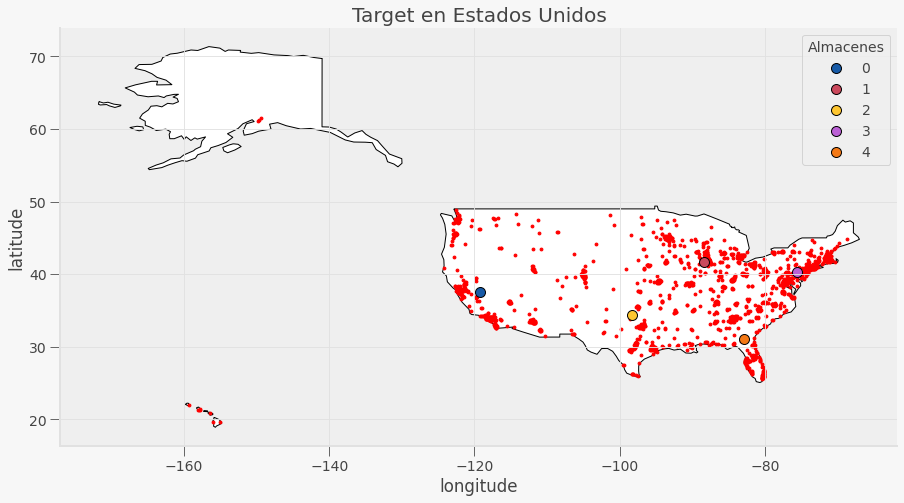

In [410]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(15,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red',markersize=8,alpha=1)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

for i in range(len(centros)):
	
  plt.scatter(centros[i][1],  centros[i][0],label = i, s = 100,edgecolors='black')
plt.legend(title="Almacenes",loc = 0,frameon=True)
plt.show()

**Comentarios:**

Se observa la ubicacion de los 5 almacenes dentro de estados unidos que el modelo de KMeans dio como resultado.

¿a cuantas tiendas va surtir?

**Comentarios:**

Se obtiene las etiquetas para cada coordenada de cada tienda target, por ejemplo la tienda 1 le correspondera el almacen 1 etc.

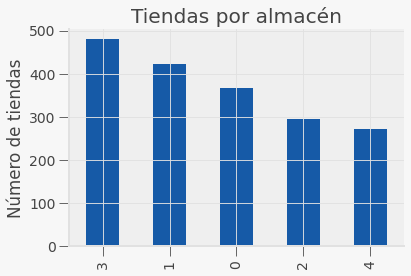

In [413]:
latlong["kmeans"]=model.labels_
plt.title('Tiendas por almacén')
plt.ylabel('Número de tiendas')
latlong.kmeans.value_counts().plot(kind='bar')



**Comentarios:**

Se observa que la tienda 4 es el que tendra mayor numero de tiendas esto podria llevar a pensar en su capacidad y tamaño ya que surtira a mas 450 tiendas.

Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, después nos auxiliamos de una librería de datos geográficos.

**¿qué librerías nos pueden ayudar a graficar este tipo de datos?**

> *GDAL es el acrónimo de la librería Geospatial Data Abstraction Library. Fue creada en los años 90 por Frank Warmerdam y publicada originalmente en el año 2000.*

>*Por su parte, el nombre OGR proviene de OpenGIS Simple Features Reference Implementation, nombre olvidado y adaptado posteriormente a OGR Simple Features Library.*

>*GeoPandas También permite graficar datos y mostrar visualizaciones de mapas, en este caso mediante matplotlib. Puedes echar un vistazo a nuestro artículo sobre generación de mapas con GeoPandas y matplotlib para conocer más acerca de éstas y otras librerías para visualización de datos espaciales y confección de mapas en Python.*

>*Fiona: para leer y escribir archivos vectoriales.
El propósito principal de la librería de Python Fiona es la lectura y escritura de archivos geométricos de tipo vectorial.*

>*Shapely: para manipular datos vectoriales
La librería Shapely para Python está enfocada en la manipulación y el análisis de datos vectoriales. Se basa en GEOS, una librería escrita en C++ que provee de algoritmos a PostGIS, además de a otras librerías como sf para el lenguaje R.*
>>*Shapely trabaja básicamente con elementos geométricos de tipo Punto, Línea y Polígono.*

**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

>*Es importante el uso de que se grafique datos en un mapa ya que nos ayuda a la visualización de datos inmediatamente cuando el público o la gente interesada en revisar los datos se dará cuenta que hablamos de ubicaciones en un cierto estado o país ya que inmediatamente el cerebro asociara al observar el mapa con el contenido hará más fácil la explicación de los datos.*


**Agrega las conclusiones:**
>Después de revisar los datos y hacer varios pasos se observa que con 5 cluster (Almacenes=Warehouses) en el análisis mostro las ubicaciones donde es la distancia optima de implementar estos almacenes.

>Cabe mencionar que las gráficas en forma de mapa facilitaron mucho el análisis de estos datos ya que se entendía la meta del proyecto.

> Un punto de mejora del análisis del valor óptimo de cluster (Numero de almacenes o Warehouses) es que al ser solo 5 en algunas ubicaciones la distancia es de más de 4,000 Km cosa que nos lleva a pensar que tal vez un parámetro de elección de ese número pueda tener otros factores no solo el óptimo.

>También al analizar los resultados el tamaño de estos almacenes (Warehouses) debe ser de un tamaño considerable ya que estamos hablando que surtirán en algunos casos más de 400 tiendas lo que nos lleva a pensar que posiblemente una variable en un modelo más complejo sea las ventas de estas tiendas pueda ayudarnos a tomar una mejor decisión de la cantidad de almacenes o clusters en el modelo.




# Referencias:

>Aprende MAchine Learning.(2018).*K-Means en Python paso a paso*.https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

>Pypy.org.(2021).*geopy 2.2.0*.https://pypi.org/project/geopy/

>Scikit-learn developers(S.F.).*sklearn.cluster.KMeans*.https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

>Acervo Lima.(2022).*¿CÓMO OBTENER LA GEOLOCALIZACIÓN EN PYTHON?*.https://es.acervolima.com/como-obtener-la-geolocalizacion-en-python/#:~:text=La%20funci%C3%B3n%20geocode()%20acepta,llam%C3%A1ndolo%20con%20la%20sintaxis%20dada.

>Alade.(2018).*Tutorial: How to determine the optimal number of clusters for k-means clustering*.https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

>Geomapik.(2018).*Librerías Python GIS para manipular y analizar datos espaciales*.https://www.geomapik.com/desarrollo-programacion-gis/librerias-python-gis/

>Géron, A. (2022). Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow. " O'Reilly Media, Inc.".

>VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc.".